In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import torch
import pandas as pd
from torchvision import transforms, datasets, models
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import cv2
#import skimage
import numpy as np
from pad_pic import pad_to_square_from_path
from utils.xray_plot import draw_pred
from cv2 import cvtColor, COLOR_BGR2RGB


device = "cuda" if torch.cuda.is_available() else "cpu"

In [66]:
# not robust with other resizes and flips
transform_pipeline =  transforms.Compose([pad_to_square_from_path,
                                          transforms.ToPILImage(),
                                          lambda img: cvtColor(np.array(img), COLOR_BGR2RGB),

                                          lambda img: cv2.resize(img, (256,256)),
                                          lambda img: torch.from_numpy(img).permute(2, 1, 0),
                              lambda x: x/255,
                               transforms.Normalize(
                                    mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
                                    ])
# mean=[0.485, 0.456, 0.406],
# std=[0.229, 0.224, 0.225])
invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                     std = [ 1., 1., 1. ]),
                                lambda x: x*255
                               ])


In [67]:
class XrayPretrained(nn.Module):
    def __init__(self):
        super(XrayPretrained, self).__init__()
        self.resnet = pretrained_model # output size = resnet18_shape
        self.fc1=nn.Linear(resnet34_shape,  output_size)

    def forward(self, x):
        x = self.resnet(x)
        x = nn.functional.relu(x)
        x = self.fc1(x)
        return x
model = torch.load("resnet34-600ep-adam")

In [68]:
model.eval()
with torch.no_grad():
    unlabeled_x = transform_pipeline("a7dzl1fp5yd.jpeg").unsqueeze(0)
    outputs = model(unlabeled_x)


In [69]:
unlabeled_x.shape

torch.Size([1, 3, 256, 256])

In [70]:
inv_unlabeled_x = invTrans(unlabeled_x)

In [71]:
inv_unlabeled_x.shape

torch.Size([1, 3, 256, 256])

tensor([137.4256, 112.4236,  46.2928, 155.0833, 178.6525])


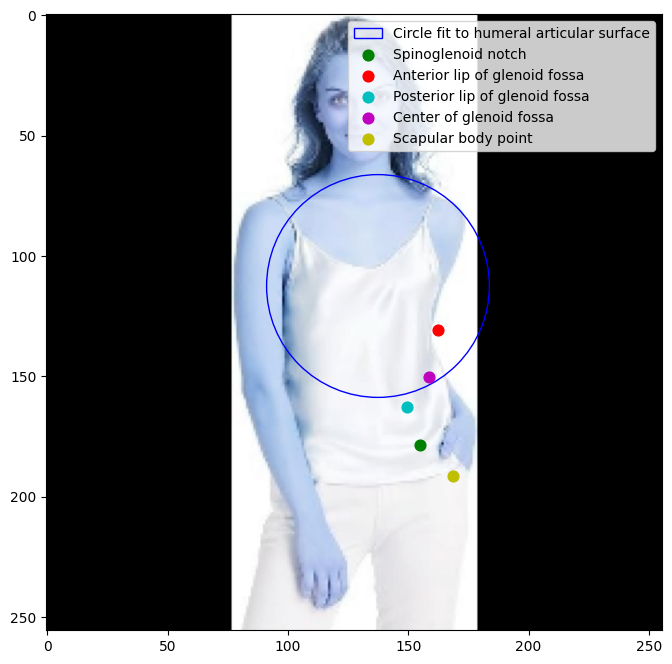

In [72]:
plt.figure(figsize=(20, 8))
draw_pred(inv_unlabeled_x, outputs, 0)


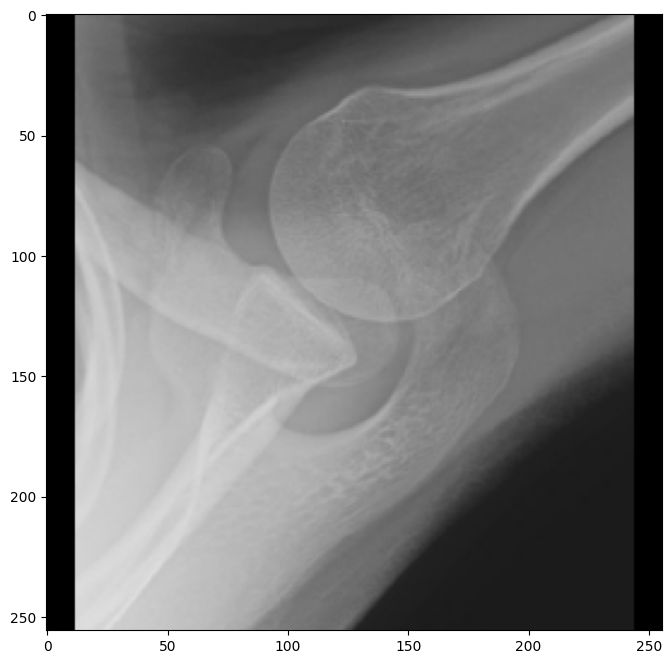

In [50]:
plt.figure(figsize=(20, 8))

plt.imshow(i);